## Kaggle : 
House Prices: Advanced Regression Techniques

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [45]:
import pandas as pd
import numpy as np
data_train=pd.read_csv("../data/train.csv")
data_train.head(5)
data_train.head()
data_train.describe()
y=data_train.loc[:,['SalePrice']]
feature_choosed=["LotArea","LotFrontage",]
X_first=data_train.drop(columns=["SalePrice","Alley","FireplaceQu","PoolQC"])
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

voir colonnes object

In [58]:
def separated_qualitativeVSquantitative (data):
    feature=data.columns
    objet_features=[]
    number_features=[]
    for col in feature:
        if data[col].dtype=="object":
            objet_features.append(col)
        else:
            number_features.append(col)
    # data quantitative
    data_feature_digital=data.loc[:,number_features]
    # data qualitative
    data_feature_qualitatives=data.loc[:,objet_features]
    return (data_feature_digital,data_feature_qualitatives,)

dt_quantitative,dt_qual=separated_qualitativeVSquantitative(test_n)

def selections_Y(data,nom_du_Y):
    y=data.loc[:,[nom_du_Y]]
    return y


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


KeyError: "None of [['SalePrice']] are in the [columns]"

In [21]:
def na_rows(df):
    return df.columns[df.isna().any()] 

In [22]:
# remplacement des Na par valeur mediane 
data_feature_digital['LotFrontage']=data_feature_digital.fillna(data_feature_digital['LotFrontage'].median())
data_feature_digital['MasVnrArea']=data_feature_digital.fillna(data_feature_digital['MasVnrArea'].median())
data_feature_digital['GarageYrBlt']=data_feature_digital.fillna(data_feature_digital['GarageYrBlt'].median())

# predict

linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data_feature_digital,y, test_size=0.3, random_state=0)
print(len(X_train),len(X_test), len(y_train), len(y_test))
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
    # check the accuracy on the training set
accuracy_train=model.score(X_train, y_train)
print("the accurucy on the training set is %f"%(accuracy_train))
predi=model.predict(X_test)
accuracy_test=model.score(X_test,y_test)
print(X_test.columns)
print("the accurucy on the tesx set is %f"%(accuracy_test))

dt_test_quantitative,dt_test_qual,y=separated_qualitativeVSquantitativeVsY(data_train,'SalePrice')


1022 438 1022 438
the accurucy on the training set is 0.836360
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
the accurucy on the tesx set is 0.726088


NameError: name 'test' is not defined

## traitement des variables quantitatives (les 10 plus correlees)

In [27]:
data_feature_digital.info()
feature_na=["LotFrontage","MasVnrArea","GarageYrBlt"]
data_digital_nan=data_feature_digital.drop(columns=feature_na)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [28]:
correlation=data_train.corr(method='pearson')


#print("\n"+'correlations initiales relatives = '+"\n",correlation['SalePrice'].sort_values(ascending= False),"\n")
correlation = correlation['SalePrice'].abs().sort_values(ascending= False)
#print('correlations initiales absolues = ',type(correlation),"\n",correlation,"\n","\n")
correlation

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

On selectionne les dix features les plus corrélées

In [30]:
interesting_numeric_variable=data_train.loc[:,["Id","OverallQual","GrLivArea","GarageCars","GarageArea",
                                               "TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt"]]

interesting_numeric_variable=interesting_numeric_variable.rename(columns={"OverallQual":"Quality_house","GrLivArea" : "superficieMaison","GarageCars":"Capacite_garage_voiture",
                                                                          "GarageArea":"superficie_garage","TotalBsmtSF":"superfice_sousol","1stFlrSF":"superficie_rdc",
                                                                          "FullBath":"NbrsSDB","TotRmsAbvGrd":"nmbrePiece","YearBuilt":"anneeConstruction"})
data_train=data_train.rename(columns={"OverallQual":"Quality_house","GrLivArea" : "superficieMaison","GarageCars":"Capacite_garage_voiture",
                                                                          "GarageArea":"superficie_garage","TotalBsmtSF":"superfice_sousol","1stFlrSF":"superficie_rdc",
                                                                          "FullBath":"NbrsSDB","TotRmsAbvGrd":"nmbrePiece","YearBuilt":"anneeConstruction"})

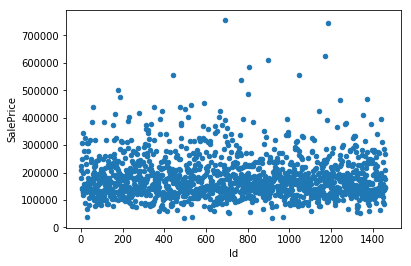

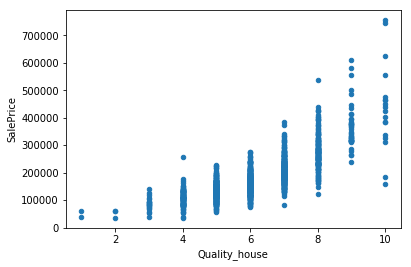

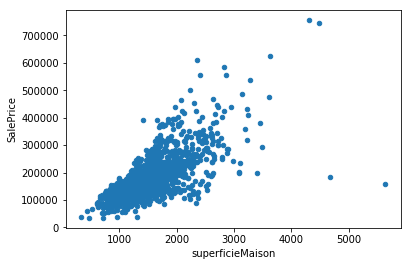

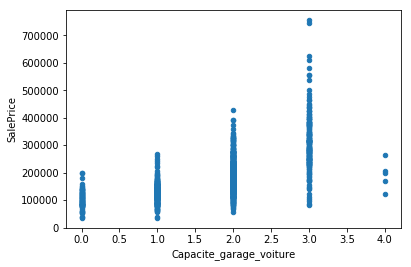

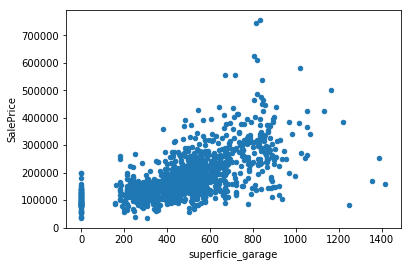

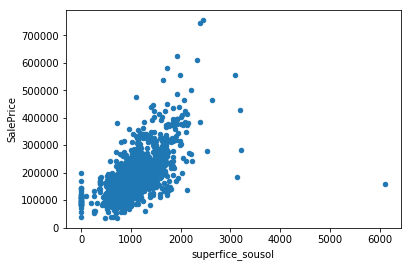

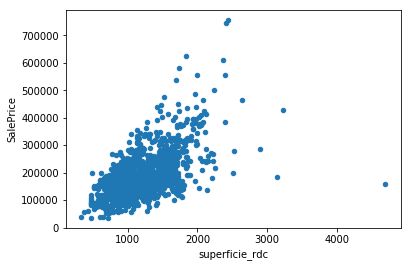

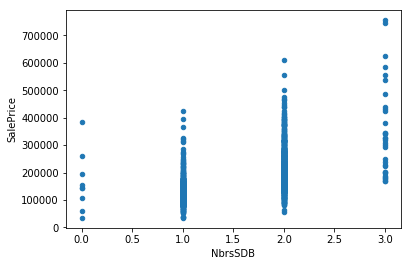

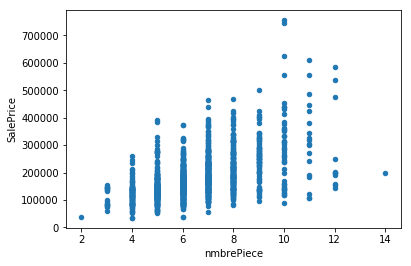

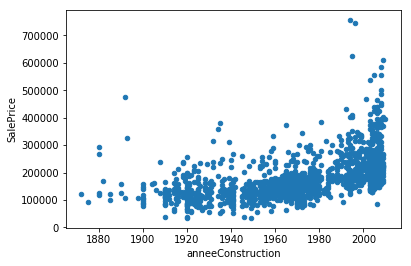

In [31]:
%matplotlib inline
def scatter_numerical_variables_and_saleprice(data, col):
    Grid_SalePrice = pd.concat([data["SalePrice"], data[col]], axis=1)
    Grid_SalePrice.plot.scatter(x=col, y='SalePrice')
    

for feature in interesting_numeric_variable:
    scatter_numerical_variables_and_saleprice(data_train,feature)
   

    préparation des données test

In [41]:
test_n=pd.read_csv("../data/test.csv")
test=test_n.loc[:,["Id","OverallQual","GrLivArea","GarageCars","GarageArea",
                                               "TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt",]]
def na_rows(df):
    return df.columns[df.isna().any()] 

# remplace les NAN par 0 car pas de garage ni sous-sol
test=test.fillna(0)


modèle avec uniquement variables quantitatives

In [35]:
data_train_tenthFeature=pd.concat([interesting_numeric_variable,y],axis=1)
data_train_tenthFeature.to_csv('data_train_tnethfeat.csv')
print(data_train_tenthFeature)
# train test split
from sklearn import linear_model
linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(interesting_numeric_variable,y, test_size=0.3, random_state=0)
print(len(X_train),len(X_test), len(y_train), len(y_test))
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
    # check the accuracy on the training set
accuracy_train=model.score(X_train, y_train)
print("the accurucy on the training set is %f"%(accuracy_train))
predi=model.predict(X_test)
accuracy_test=model.score(X_test,y_test)
print(X_test.columns)
print("the accurucy on the tesx set is %f"%(accuracy_test))



        Id  Quality_house  superficieMaison  Capacite_garage_voiture  \
0        1              7              1710                        2   
1        2              6              1262                        2   
2        3              7              1786                        2   
3        4              7              1717                        3   
4        5              8              2198                        3   
5        6              5              1362                        2   
6        7              8              1694                        2   
7        8              7              2090                        2   
8        9              7              1774                        2   
9       10              5              1077                        1   
10      11              5              1040                        1   
11      12              9              2324                        3   
12      13              5               912                     

In [24]:
def model_data_test(X,Y,model_pred): 
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
    print(len(X_train),len(X_test), len(y_train), len(y_test))
    model = model_pred
    model.fit(X_train, y_train)
        # check the accuracy on the training set
    accuracy_train=model.score(X_train, y_train)
    print("the accurucy on the training set is %f"%(accuracy_train))
    predi=model.predict(X_test)
    accuracy_test=predi.score(X_test,y_test)
    print(X_test.columns)
    print("the accurucy on the tesx set is %f"%(accuracy_test))
    
model_data_test(interesting_numeric_variable,test,linear_model.LinearRegression())


NameError: name 'interesting_numeric_variable' is not defined

In [38]:
test.to_csv('data_test_tenth.csv')
predict =model.predict(test)
#predict = pd.DataFrame(predict)
#predic_kaggle=predict.tolist()
#print('predic_kaggle',predic_kaggle)
houses_id = pd.DataFrame(test_n['Id'])
print(type(predict))
print(type(houses_id))
print(predict)
#houses_id = houses_id.reshape(len(houses_id),1)
#print('houses_id',houses_id)
#print('houses_id.shape',houses_id.shape)
#print(len(houses_id))
data = pd.DataFrame({'Id' :test_n.Id,'SalePrice' : np.reshape(predict, (-1))})
print(data)
data = data.set_index('Id')
type(data)
data.to_csv('../output/'+'tenth_numerica.csv')

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
[[126811.85844488]
 [167660.10595322]
 [167512.212204  ]
 ...
 [150276.71769184]
 [106217.03089697]
 [233452.57823179]]
        Id      SalePrice
0     1461  126811.858445
1     1462  167660.105953
2     1463  167512.212204
3     1464  183778.917629
4     1465  217256.924784
5     1466  176960.080682
6     1467  165222.314028
7     1468  166339.927636
8     1469  208909.554034
9     1470  102422.285057
10    1471  208972.590516
11    1472  116206.385471
12    1473  107369.366016
13    1474  163029.821653
14    1475  144500.283293
15    1476  326833.389094
16    1477  266555.088859
17    1478  292684.532633
18    1479  283199.077801
19    1480  404669.630515
20    1481  305922.678334
21    1482  229580.596386
22    1483  184627.774978
23    1484  186169.685336
24    1485  169868.956153
25    1486  207354.381335
26    1487  325831.586856
27    1488  271435.972534
28    1489  207203.168501
29    1490  203625.592264
...    ...  

## traitement des variables qualitatives

dictionnaire 

Transformation des variables qualitative en numérique


In [26]:
valeur = {}

valeur['MSZoning'] = { 
 
 'values' : {
		
       'A':0, 
       'C':1,
       'FV':2,
       'I':3,
       'RH':4,
       'RL':5,
       'RP':6,
       'RM':7
},
'type':'onehot'
}

valeur['Street'] = { 
 
 'values' : {
       'Grvl':0,
       'Pave':1
},
'type':'num'
}
       	
valeur['Alley'] = { 
 
 'values' : {

       'Grvl':0,
       'Pave':1,
       'nan':-1
},
'type':'num'
}

valeur['LotShape'] = { 
 
 'values' : {
       'Reg' : 0,
       'IR1' : 1,
       'IR2' : 2,
       'IR3' : 3 
},
'type':'num'
}

valeur['LandContour'] = { 
 
 'values' : {

       'Lvl': 0,
       'Bnk': 1,
       'HLS': 2,
       'Low': 3
},
'type':'num'
}
		
valeur['Utilities'] = { 
 
 'values' : {
       'AllPub' : 0,
       'NoSeWa' : 1
},
'type':'num'
}
    	
	
valeur['LotConfig'] = { 
 
 'values' : {

       'Inside': 0,
       'Corner': 1,
       'CulDSac': 2,
       'FR2': 3,
       'FR3': 4 
},
'type':'onehot'
} 
	
valeur['LandSlope'] = { 
 
 'values' : {
		
       'Gtl':0,
       'Mod':1,
       'Sev':2
},
'type':'num'
}
	
valeur['Neighborhood'] = { 
 
 'values' : {

       'Blmngtn':0,
       'Blueste':1,
       'BrDale':2,
       'BrkSide':3,
       'ClearCr':4,
       'CollgCr':5,
       'Crawfor':6,
       'Edwards':7,
       'Gilbert':8,
       'IDOTRR':9,
       'MeadowV':10,
       'Mitchel':11,
       'Names':12,
       'NoRidge':13,
       'NPkVill':14,
       'NridgHt':15,
       'NWAmes':16,
       'OldTown':17,
       'SWISU':18,
       'Sawyer':19,
       'SawyerW':20,
       'Somerst':21,
       'StoneBr':22,
       'Timber':23,
       'Veenker':24
},
'type':'onehot'
}
			
valeur['Condition1'] = { 
 
 'values' : {
	
       'Artery' : 0,
       'Feedr' : 1,
       'Norm' : 2,
       'RRNn' : 3,
       'RRAn' : 4,
       'PosN' : 5,
       'PosA' : 6,
       'RRNe' : 7,
       'RRAe' : 8
},
'type':'onehot'
}

valeur['Condition2'] = { 
 
 'values' : {
		
       'Artery':0,
       'Feedr':1,
       'Norm':2,
       'RRNn':3,
       'RRAn':4,
       'PosN':5,
       'PosA':6,
       'RRNe':7,
       'RRAe':8
},
'type':'onehot'
}
	
valeur['BldgType'] = { 
 
 'values' : {
		
       '1Fam': 0,
       '2FmCon': 1,
       'Duplx': 2,
       'TwnhsE': 3,
       'TwnhsI': 4,
},
'type':'num'
}
       
	
valeur['HouseStyle'] = { 
 
 'values' : {
       '1Story':0,
       '1.5Fin':1,
       '1.5Unf':2,
       '2Story':3,
       '2.5Fin':4,
       '2.5Unf':5,
       'SFoyer':6,
       'SLvl':7
},
'type':'num'
}
	
valeur['RoofStyle'] = { 
 'values' : {

       'Flat' : 0,
       'Gable' : 1,
       'Gambrel' : 2,
       'Hip': 3,
       'Mansard' : 4,
       'Shed' : 5
},
'type':'num'
}
		
valeur['RoofMatl'] = { 
 
 'values' : {

       'ClyTile': 0,
       'CompShg': 1,
       'Membran': 2,
       'Metal': 3,
       'Roll': 4,
       'Tar&Grv': 5,
       'WdShake': 6,
       'WdShngl': 7
},
'type':'onehot'
}

		
valeur['Exterior1st'] = { 
 
 'values' : {

       'AsbShng' : 0,
       'AsphShn' : 1,
       'BrkComm': 2,
       'BrkFace' : 3,
       'CBlock' : 4,
       'CemntBd' : 5,
       'HdBoard' : 6,
       'ImStucc' : 7,
       'MetalSd' : 8,
       'Other' : 9,
       'Plywood' : 10,
       'PreCast' : 11,
       'Stone' : 12,
       'Stucco' : 13,
       'VinylSd' : 14,
       'Wd Sdng' : 15,
       'WdShing' : 16
},
'type':'onehot'
}

	
valeur['Exterior2nd'] = { 
 
 'values' : {

       'AsbShng' : 0,
       'AsphShn' : 1,
       'BrkComm' : 2,
       'BrkFace' : 3,
       'CBlock' : 4,
       'CemntBd' : 5,
       'HdBoard' : 6,
       'ImStucc' : 7,
       'MetalSd' : 8,
       'Other' : 9,
       'Plywood' : 10,
       'PreCast' : 11,
       'Stone' : 12,
       'Stucco' : 13,
       'VinylSd' : 14,
       'Wd Sdng' : 15,
       'WdShing' : 16
},
'type':'onehot'
}
	
valeur['MasVnrType'] = { 
    'values' : {
    
        'BrkFace':1,
        'BrkCmn':0,
       'CBlock':2,
       'None':3,
       'Stone':4
},
'type':'onehot'
}
	

valeur['ExterQual'] = { 
 
 'values' : {
		
       'Ex' : 4,
       'Gd' : 3,
       'TA' : 2,
       'Fa' : 1,
       'Po' : 0
},
'type':'num'
}
		
valeur['ExterCond'] = { 
 
 'values' : {

       'Ex' : 4,
       'Gd' : 3,
       'TA' : 2,
       'Fa' : 1,
       'Po' : 0
},
'type':'num'
}	
    
		
valeur['Foundation'] = { 
 
 'values' : {
		
       'BrkTil' : 0,
       'CBlock' : 1,
       'PConc' : 2,
       'Slab' : 3,
       'Stone' : 4,
       'Wood' : 5
},
'type':'onehot'
}
		
valeur['BsmtQual'] = { 
 
 'values' : {
       
       'Ex' : 4,
       'Gd' : 3,
       'TA' : 2,
       'Fa' : 1,
       'Po' : 0,
       'NA' : -1
},
'type':'num'
}

		
valeur['BsmtCond'] = { 
 
 'values' : {

  
       'Ex' : 4,
       'Gd' : 3,
       'TA' : 2,
       'Fa' : 1,
       'Po' : 0,
       'NA' : -1
},
'type':'num'
}
	
valeur['BsmtExposure'] = { 
 
 'values' : {

       'Gd' : 3,
       'Av'  : 2,
       'Mn' : 1,
       'No' : 0,
       'NA' : -1
},
'type':'num'
}
	
valeur['BsmtFinType1'] = { 
 
 'values' : {

       'GLQ' : 5,
       'ALQ' : 4,
       'BLQ' : 3,
       'Rec' : 2,
       'LwQ' : 1,
       'Unf' : 0,
       'NA' : -1
},
'type':'onehot'
}
		

valeur['BsmtFinType2'] = { 
 
 'values' : {


       'GLQ' : 5,
       'ALQ' : 4,
       'BLQ' : 3,
       'Rec' : 2,
       'LwQ' : 1,
       'Unf' : 0,
       'NA' : -1
},
'type':'onehot'
}
valeur['Heating'] = { 
 
 'values' : {
		
       'GasA' : 0,
       'Floor' : 1,
       'GasW' : 2,
       'Grav' : 3,
       'OthW' : 4,
       'Wall' : 5
},
'type':'onehot'
}

valeur['HeatingQC'] = { 
 
 'values' : {

       'Ex' : 4,
       'Gd' : 3,
       'TA' : 2,
       'Fa' : 1,
       'Po' : 0,
},
'type':'num'
}
      

		
valeur['CentralAir'] = { 
 
 'values' : {

       'N': 0,
       'Y': 1
},
'type':'num'
}
		
valeur['Electrical'] = { 

 'values' : {

       'SBrkr':0,
       'FuseA':1,
       'FuseF':2,
       'FuseP':3,
       'Mix':4
},
'type':'onehot'
}

valeur['KitchenQual'] = { 
 
 'values' : {

       'Ex' : 4,
       'Gd' : 3,
       'TA' : 2,
       'Fa' : 1,
       'Po' : 0
},
'type':'num'
}

      

valeur['Functional'] = { 
 
 'values' : {

       'Typ':0,
       'Min2': 1,
       'Mod': 2,
       'Maj1': 3,
       'Maj2': 4,
       'Sev': 5,
       'Sal': 6
},
'type':'num'
}
	
valeur['FireplaceQu'] = { 
 
 'values' : {

       'Ex' : 4,
       'Gd' : 3,
       'TA' : 2,
       'Fa' : 1,
       'Po' : 0,
       'NA' : -1
},
'type':'num'
}

valeur['GarageType'] = { 
 
 'values' : {
		
       '2Types' : 6,
       'Attchd' : 5,
       'Basment' : 4,
       'BuiltIn' : 3,
       'CarPort' : 2,
       'Detchd' : 1,
       'NA' : 0 
},
'type':'onehot'
}
		
		
valeur['GarageFinish'] = { 
 
 'values' : {

       'Fin': 3,
       'RFn': 2,
       'Unf': 1,
       'NA': 0
},
'type':'num'
}
	
valeur['GarageQual'] = { 
 
 'values' : {

       'Ex' : 4,
       'Gd' : 3,
       'TA' : 2,
       'Fa' : 1,
       'Po' : 0,
       'NA' : -1
},
'type':'num'
}
	
valeur['GarageCond'] = { 
 
 'values' : {

       'Ex' : 4,
       'Gd' : 3,
       'TA' : 2,
       'Fa' : 1,
       'Po' : 0,
       'NA' : -1
},
'type':'num'
}
		
valeur['PavedDrive'] = { 
 
 'values' : {

       'Y' : 0,
       'P' : 1,
       'N' : 2
       },
       'type':'onehot'
}
		


valeur['PoolQC'] = { 
 
 'values' : {

       'Ex' : 4,
       'Gd' : 3,
       'TA' : 2,
       'Fa' : 1,
       'NA' : 0
},
'type':'num'
}
		
valeur['Fence'] = { 
 
 'values' : {
		
       'GdPrv' : 3, 
       'MnPrv' : 2, 
       'GdWo' : 1, 
       'MnWw' : 0, 
       'NA' : -1 
},
'type':'num'
}
	
valeur['MiscFeature'] = { 
 
 'values' : {
		
       'Elev' : 4,
       'Gar2' : 3,
       'Othr' : 2,
       'Shed' : 1,
       'TenC' : 0,
       'NA' : -1
       },
       'type':'num'
       }


valeur['SaleType'] = { 
 
 'values' : {
		
       'WD': 0,
       'CWD': 1,
       'VWD': 2,
       'New': 3,
       'COD': 4,
       'Con':5,
       'ConLw': 6,
       'ConLI': 7,
       'ConLD': 8,
       'Oth': 9
  },
       'type':'num'
       }

valeur['SaleCondition'] = { 
 
 'values' : {

       'Normal': 0,
       'Abnorml': 1,
       'AdjLand': 2,
       'Alloca': 3,
       'Family': 4,
       'Partial': 5
},
       'type':'num'
}

In [211]:
#for col in data_feature_qualitatives.columns:
#    data[col] = data_feature_qualitatives[col].map(valeur[col]["values"])
print('data_train.columns',data_train.columns)
print('data_feature_qualitatives.columns',data_feature_qualitatives.columns)
for col in data_feature_qualitatives.columns:
        col_type = data_feature_qualitatives[col].dtype
        if col_type == 'object' and col in valeur:
            #p(col+' unique',unique)
            if valeur[col]['type'] == 'num':
                map_array = valeur[col]['values']
                print('map_array',map_array)
                #to_map = dict(zip(map_array[::-1],range(len(map_array))))
                data_train[col] = data_train[col].map(map_array)
            elif valeur[col]['type'] == 'onehot':
                data_train = pd.concat([data_train, pd.get_dummies(data_train[col], prefix=col)], axis=1)
                data_train = data_train.drop(col, axis=1)
            else:
                print('unrecognized type!!!!!!!')
                

data_train.columns Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'Quality_house', 'OverallCond', 'anneeConstruction',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'superfice_sousol',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'superficie_rdc',
       '2ndFlrSF', 'LowQualFinSF', 'superficieMaison', 'BsmtFullBath',
       'BsmtHalfBath', 'NbrsSDB', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'nmbrePiece', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'Capacite_garage_voiture',
   

In [235]:
colunne=list(data_feature_qualitatives.columns)
colunne

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [247]:
data_train
data_train=data_train.fillna(-1)


,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,...,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1,60,65.0,8450,1,-1.0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,2,20,80.0,9600,1,-1.0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,3,60,68.0,11250,1,-1.0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,4,70,60.0,9550,1,-1.0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,5,60,84.0,14260,1,-1.0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
5,6,50,85.0,14115,1,-1.0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
6,7,20,75.0,10084,1,-1.0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
7,8,60,-1.0,10382,1,-1.0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
8,9,50,51.0,6120,1,-1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,10,190,50.0,7420,1,-1.0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


a faire :
renommer colonne
traiter les données qualitative

In [249]:
# train test split
from sklearn import linear_model
reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data_train,y, test_size=0.3, random_state=0)
print(len(X_train),len(X_test), len(y_train), len(y_test))
reg.fit(X_train, y_train)
    # check the accuracy on the training set
accuracy_train=model.score(X_train, y_train)
print("the accurucy on the training set is %f"%(accuracy_train))
predi=model.predict(X_test)
accuracy_test=model.score(X_test,y_test)
print(X_test.columns)
print("the accurucy on the tesx set is %f"%(accuracy_test))


1022 438 1022 438
the accurucy on the training set is 0.795499
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       ...
       'Electrical_SBrkr', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y'],
      dtype='object', length=198)
the accurucy on the tesx set is 0.004566


In [ ]:

predict =model.predict(test)
#predict = pd.DataFrame(predict)
#predic_kaggle=predict.tolist()
#print('predic_kaggle',predic_kaggle)
houses_id = pd.DataFrame(test_n['Id'])
print(type(predict))
print(type(houses_id))
print(predict)
#houses_id = houses_id.reshape(len(houses_id),1)
#print('houses_id',houses_id)
#print('houses_id.shape',houses_id.shape)
#print(len(houses_id))
data = pd.DataFrame({'Id' :test_n.Id,'SalePrice' : np.reshape(predict, (-1))})
print(data)
data = data.set_index('Id')
type(data)
data.to_csv('../output/'+'tenth_numerica.csv')